<a href="https://colab.research.google.com/github/Alice049/ml/blob/main/Teens_login_Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
teens=pd.read_csv("/content/snsdata.csv")
print(teens.shape)

(30000, 40)


In [ ]:
print(teens.dtypes)

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object


In [ ]:
teens['gradyear']=teens['gradyear'].astype('str')

In [ ]:
print(teens.describe(include='all'))

       gradyear gender           age       friends    basketball  \
count     30000  27276  24914.000000  30000.000000  30000.000000   
unique        4      2           NaN           NaN           NaN   
top        2006      F           NaN           NaN           NaN   
freq       7500  22054           NaN           NaN           NaN   
mean        NaN    NaN     17.993950     30.179467      0.267333   
std         NaN    NaN      7.858054     36.530877      0.804708   
min         NaN    NaN      3.086000      0.000000      0.000000   
25%         NaN    NaN     16.312000      3.000000      0.000000   
50%         NaN    NaN     17.287000     20.000000      0.000000   
75%         NaN    NaN     18.259000     44.000000      0.000000   
max         NaN    NaN    106.927000    830.000000     24.000000   

            football        soccer      softball    volleyball     swimming  \
count   30000.000000  30000.000000  30000.000000  30000.000000  30000.00000   
unique           NaN     

In [ ]:
print(teens.isnull().sum().head())

gradyear         0
gender        2724
age           5086
friends          0
basketball       0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
teens_z=sc.fit_transform(teens.iloc[:,4:])

In [ ]:
print(type(teens_z))

<class 'numpy.ndarray'>


In [ ]:
print(pd.DataFrame(teens_z[:,30:33]).describe())

                  0             1             2
count  3.000000e+04  3.000000e+04  3.000000e+04
mean   5.494864e-17  1.136868e-17 -9.687066e-17
std    1.000017e+00  1.000017e+00  1.000017e+00
min   -2.014763e-01 -1.830317e-01 -2.947932e-01
25%   -2.014763e-01 -1.830317e-01 -2.947932e-01
50%   -2.014763e-01 -1.830317e-01 -2.947932e-01
75%   -2.014763e-01 -1.830317e-01 -2.947932e-01
max    2.575205e+01  2.843431e+01  3.493308e+01


In [ ]:
from sklearn.cluster import KMeans
mdl=KMeans(n_clusters=5,init='random')

In [ ]:
pre=dir(mdl)
print(pre[51:56])

['_warn_mkl_vcomp', 'algorithm', 'copy_x', 'fit', 'fit_predict']


In [ ]:
mdl.fit(teens_z)
post=dir(mdl)
print(post[51:56])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['_tol', '_transform', '_validate_center_shape', '_validate_data', '_validate_params']


In [ ]:
print(list(set(post)-set(pre)))

['_tol', '_n_init', '_n_threads', 'n_features_in_', 'inertia_', 'labels_', 'n_iter_', '_n_features_out', 'cluster_centers_', '_algorithm']


In [ ]:
import pickle
filename='/content/kmeans.sav'
res=pickle.load(open(filename,'rb'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
print(res.labels_.shape)

(30000,)


In [ ]:
print(pd.Series(res.labels_).value_counts())

1    21407
0     5878
4     1038
3      872
2      805
dtype: int64


In [ ]:
print(res.labels_[:10])

[1 0 1 1 4 1 3 1 1 0]


In [ ]:
print(res.cluster_centers_.shape)

(5, 36)


In [ ]:
cen=pd.DataFrame(res.cluster_centers_,index=range(5),columns=teens.iloc[:,4:].columns)
print(cen)

   basketball  football    soccer  softball  volleyball  swimming  \
0    0.541638  0.498651  0.313124  0.378903    0.388723  0.297349   
1   -0.167014 -0.164922 -0.093100 -0.114401   -0.116335 -0.105793   
2   -0.120725  0.028000 -0.080351 -0.018080   -0.083903  0.042790   
3    0.159450  0.235740  0.105960  0.073539    0.188502  0.241352   
4    0.343011  0.363468  0.123698  0.170193    0.109037  0.265534   

   cheerleading  baseball    tennis    sports  ...    blonde      mall  \
0      0.332664  0.364847  0.143850  0.340191  ...  0.034946  0.481351   
1     -0.112273 -0.110466 -0.050883 -0.131588  ... -0.028963 -0.182668   
2     -0.103470 -0.105889  0.018495 -0.115168  ... -0.014481 -0.102094   
3      0.394692  0.031868  0.134977  0.104556  ...  0.062426  0.605871   
4      0.184155  0.271593  0.108737  0.792916  ...  0.358767  0.617368   

   shopping   clothes  hollister  abercrombie       die     death     drunk  \
0  0.668546  0.376171  -0.054072    -0.073931  0.035882  0.11

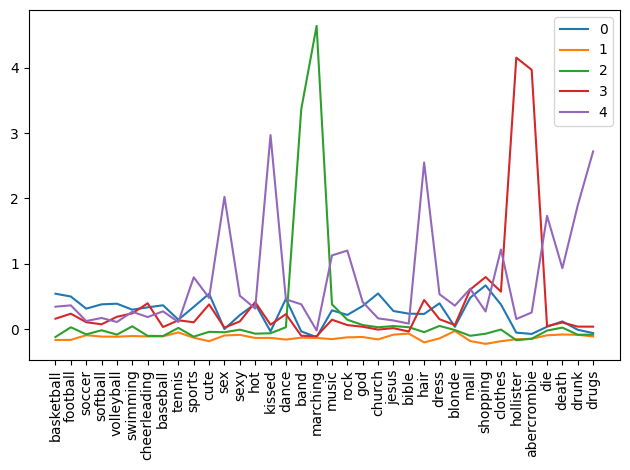

In [ ]:
ax=cen.T.plot()
ax.set_xticks(list(range(36)))
ax.set_xticklabels(list(cen.T.index),rotation=90)
fig=ax.get_figure()
fig.tight_layout()